In [30]:
import collections
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ('inner_mouth', (60, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

In [31]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-p", "--shape-predictor", required=True,
# 	help="path to facial landmark predictor")
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
# load the input image, resize it, and convert it to grayscale
image = cv2.imread('./wideset.jpg')
image = imutils.resize(image, width=1500, height=1500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)
print(rects)

rectangles[[(428, 502) (1093, 1168)]]


In [32]:
stacked_coors = []
for (index, rect) in enumerate(rects):
#     print(rect)
    print(index)
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
    tuple_list = list(a_dict)
#     print(tuple_list)
    stacked_coors.append({"mouth" : [], # mouth
             "inner_mouth" : [],
             "right_eyebrow" : [], # right_eyebrow
             "left_eyebrow" : [], # left_eyebrow
             "right_eye" : [], # right_eye
             "left_eye" : [], # left_eye
             "nose" : [], # nose
             "jaw" : []})
    for f in range(len(tuple_list)):
        key_value = tuple_list[f]
        print(key_value)
        name = key_value[0]
    
        i = key_value[1][0]
        j = key_value[1][1]
        
        for (x, y) in shape[i:j]:
            stacked_coors[index][name].append((x,y))

0
('mouth', (48, 68))
('inner_mouth', (60, 68))
('right_eyebrow', (17, 22))
('left_eyebrow', (22, 27))
('right_eye', (36, 42))
('left_eye', (42, 48))
('nose', (27, 36))
('jaw', (0, 17))


In [33]:
# for (i, rect) in enumerate(rects):
#     # determine the facial landmarks for the face region, then
#     # convert the landmark (x, y)-coordinates to a NumPy array
#     shape = predictor(gray, rect)
#     shape = face_utils.shape_to_np(shape)
#     # loop over the face parts individually
#     a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
#     tuple_list = list(a_dict)
#     key_value = tuple_list[4]
#     print(key_value)
    
#     name = key_value[0]
#     i = key_value[1][0]
#     j = key_value[1][1]
#     # clone the original image so we can draw on it, then
#     # display the name of the face part on the image
#     clone = image.copy()
#     cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
#         0.7, (0, 0, 255), 2)
#     # loop over the subset of facial landmarks, drawing the
#     # specific face part
#     for (x, y) in shape[i:j]:
#         cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
#         print((x,y))
#     # extract the ROI of the face region as a separate image
#     (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
#     roi = image[y:y + h, x:x + w]
#     roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
#     # show the particular face part
#     cv2.imshow("ROI", roi)
#     cv2.imshow("Image", clone)
#     cv2.waitKey(0)
#     # visualize all facial landmarks with a transparent overlay
#     output = face_utils.visualize_facial_landmarks(image, shape)
#     cv2.imshow("Image", output)
#     cv2.waitKey(0)

In [34]:
print(stacked_coors)

[{'mouth': [(637, 1017), (683, 999), (721, 984), (752, 989), (780, 979), (816, 986), (862, 1001), (824, 1038), (789, 1055), (758, 1061), (725, 1061), (684, 1053), (662, 1021), (722, 1012), (754, 1011), (782, 1006), (838, 1006), (785, 1008), (756, 1014), (724, 1013)], 'inner_mouth': [(662, 1021), (722, 1012), (754, 1011), (782, 1006), (838, 1006), (785, 1008), (756, 1014), (724, 1013)], 'right_eyebrow': [(448, 632), (489, 598), (546, 587), (606, 586), (664, 606)], 'left_eyebrow': [(808, 604), (866, 580), (925, 574), (983, 578), (1027, 608)], 'right_eye': [(517, 713), (556, 686), (606, 688), (648, 725), (602, 738), (552, 737)], 'left_eye': [(831, 716), (870, 676), (920, 670), (960, 693), (927, 720), (877, 724)], 'nose': [(738, 696), (740, 756), (743, 815), (746, 874), (695, 914), (721, 921), (749, 929), (775, 916), (798, 903)], 'jaw': [(401, 680), (414, 771), (437, 857), (460, 941), (489, 1020), (543, 1088), (611, 1143), (688, 1188), (766, 1197), (842, 1175), (909, 1119), (966, 1058), (1

In [35]:
print(stacked_coors[0]['left_eye'])
print(stacked_coors[0]['right_eye'])

[(831, 716), (870, 676), (920, 670), (960, 693), (927, 720), (877, 724)]
[(517, 713), (556, 686), (606, 688), (648, 725), (602, 738), (552, 737)]


In [36]:
min(stacked_coors[0]['left_eye'])

(831, 716)

In [37]:
import math

# Eye Spread
spreads = []
for person in stacked_coors:
    max_left_eye = max(person['left_eye'])
    min_left_eye = min(person['left_eye'])
    max_right_eye = max(person['right_eye'])
    min_right_eye = min(person['right_eye'])
    
#     print(person['left_eye'])
#     print(person['right_eye'])
#     print([max_left_eye, ' ', min_left_eye, ' ', max_right_eye, ' ', min_right_eye])
    dist_left = ( (max_left_eye[0] - min_left_eye[0])**2 + (max_left_eye[1] - min_left_eye[1])**2 )**0.5
    dist_right = ( (max_right_eye[0] - min_right_eye[0])**2 + (max_right_eye[1] - min_right_eye[1])**2 )**0.5
    
    y_vals = [val[1] for val in stacked_coors[0]['nose']]
    nose_bridge = stacked_coors[0]['nose'][y_vals.index(min(y_vals))]
#     nose_space_left_dist = ( (nose_bridge[0] - max_left_eye[0])**2 + (max_left_eye[1] - nose_bridge[1])**2 )**0.5
#     nose_space_right_dist = ( (nose_bridge[0] - min_right_eye[0])**2 + (min_right_eye[1] - nose_bridge[1])**2 )**0.5

    nose_space_left_dist = abs(nose_bridge[0] - max_left_eye[0])
    nose_space_right_dist = abs(nose_bridge[0] - min_right_eye[0])
    
#     print(nose_space_left_dist)
#     print(dist_left)
#     print()
#     print(nose_space_right_dist)
#     print(dist_right)
    
    print(str(nose_space_left_dist/dist_left) + " " + str(nose_space_right_dist/dist_right))
    if ((nose_space_left_dist > dist_left) or (nose_space_right_dist > dist_right)):
        spreads.append("Wide Set")
    else:
        spreads.append("Close Set")
print(spreads)



1.6942122862325135 1.679989130549172
['Wide Set']


In [38]:
y_vals = [val[1] for val in stacked_coors[0]['nose']]
max_val = max(y_vals)
print(y_vals.index(max_val))

6


In [39]:
x_vals = []
y_vals = []
for i in stacked_coors[0]:
    for vals in stacked_coors[0][i]:
        x_vals.append(vals[0])
        y_vals.append(vals[1])
print(x_vals)
print(y_vals)

[637, 683, 721, 752, 780, 816, 862, 824, 789, 758, 725, 684, 662, 722, 754, 782, 838, 785, 756, 724, 662, 722, 754, 782, 838, 785, 756, 724, 448, 489, 546, 606, 664, 808, 866, 925, 983, 1027, 517, 556, 606, 648, 602, 552, 831, 870, 920, 960, 927, 877, 738, 740, 743, 746, 695, 721, 749, 775, 798, 401, 414, 437, 460, 489, 543, 611, 688, 766, 842, 909, 966, 1008, 1029, 1046, 1067, 1077]
[1017, 999, 984, 989, 979, 986, 1001, 1038, 1055, 1061, 1061, 1053, 1021, 1012, 1011, 1006, 1006, 1008, 1014, 1013, 1021, 1012, 1011, 1006, 1006, 1008, 1014, 1013, 632, 598, 587, 586, 606, 604, 580, 574, 578, 608, 713, 686, 688, 725, 738, 737, 716, 676, 670, 693, 720, 724, 696, 756, 815, 874, 914, 921, 929, 916, 903, 680, 771, 857, 941, 1020, 1088, 1143, 1188, 1197, 1175, 1119, 1058, 988, 908, 825, 741, 652]


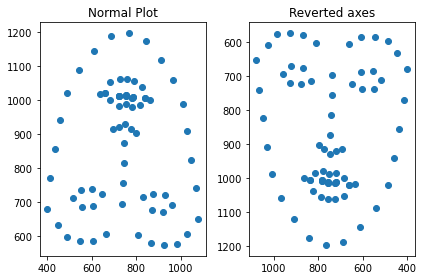

In [40]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x_vals, y_vals)
ax1.set_title("Normal Plot")

ax2.scatter(x_vals, y_vals)
ax2.set_title("Reverted axes")
ax2.invert_xaxis()
ax2.invert_yaxis()

fig.tight_layout()
plt.show()

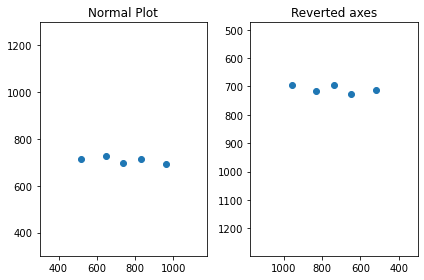

In [41]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter([max_left_eye[0], max_right_eye[0], min_left_eye[0], min_right_eye[0], nose_bridge[0]], 
            [max_left_eye[1], max_right_eye[1], min_left_eye[1], min_right_eye[1], nose_bridge[1]])
ax1.set_title("Normal Plot")

ax1.set_xlim([int(min(x_vals)-100), int(max(x_vals))+100])
ax1.set_ylim([int(min(x_vals)-100), int(max(y_vals))+100])

ax2.scatter([max_left_eye[0], max_right_eye[0], min_left_eye[0], min_right_eye[0], nose_bridge[0]], 
            [max_left_eye[1], max_right_eye[1], min_left_eye[1], min_right_eye[1], nose_bridge[1]])
ax2.set_title("Reverted axes")

ax2.set_xlim([int(min(x_vals)-100), int(max(x_vals))+100])
ax2.set_ylim([int(min(y_vals)-100), int(max(y_vals))+100])
ax2.invert_xaxis()
ax2.invert_yaxis()

fig.tight_layout()
plt.show()